### sklearn.linear_model.Ridge
* class sklearn.linear_model.Ridge(alpha=1.0, *, fit_intercept=True, copy_X=True, max_iter=None, tol=0.0001, solver='auto', positive=False, random_state=None)

In [1]:
import pandas as pd

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 
                'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = pd.read_csv('../datasets/housing.csv', header=None, 
                 delimiter=r"\s+", names=column_names)

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [7]:
y_target = df['MEDV']
X_data = df.drop(['MEDV'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_target, test_size =0.3, random_state=156)

In [8]:
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(
    ridge, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5-folds의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 3))
print('5-folds의 개별 RMSE scores : ', np.round(rmse_scores, 3))
print('5-folds의 v평균 RMSE : {0: .3f}'.format(avg_rmse))

5-folds의 개별 Negative MSE scores :  [-39.368 -21.739 -37.434 -26.32  -17.839]
5-folds의 개별 RMSE scores :  [6.274 4.663 6.118 5.13  4.224]
5-folds의 v평균 RMSE :  5.282


In [10]:
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [11]:
ridge.coef_

array([-0.09899991,  0.07158454, -0.03587402,  1.95096359, -1.97071905,
        3.200516  , -0.0056562 , -1.46784831,  0.32452012, -0.01618401,
       -0.70840332,  0.01143944, -0.61772405])

In [14]:
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)

    # 검증단계
    neg_mse_scores = cross_val_score(
        ridge, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha가 {0}일 때 5-folds의 평균 RMSE : {1: .3f}'.format(alpha, avg_rmse))

    # 실제평가
    ridge.fit(X_train, y_train)
    pred = ridge.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    print(rmse)

alpha가 0일 때 5-folds의 평균 RMSE :  5.162
4.158956107955696
alpha가 0.1일 때 5-folds의 평균 RMSE :  5.165
4.152624793103483
alpha가 1일 때 5-folds의 평균 RMSE :  5.209
4.148112018277362
alpha가 10일 때 5-folds의 평균 RMSE :  5.282
4.206979898717253
alpha가 100일 때 5-folds의 평균 RMSE :  5.379
4.400214481685921


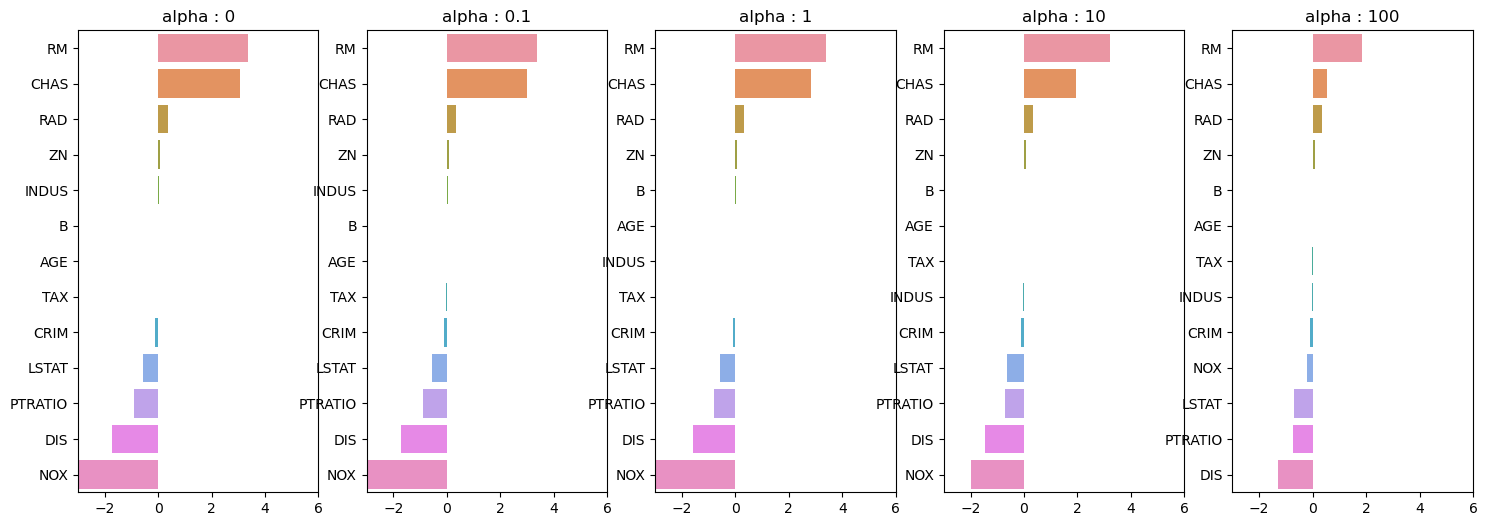

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)

    coeff = pd.Series(data=ridge.coef_, index=X_train.columns)
    colname = 'alpha : ' + str(alpha)
    coeff_df[colname] = coeff

    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

plt.show()

### sklearn.linear_model.Lasso
* class sklearn.linear_model.Lasso(alpha=1.0, *, fit_intercept=True, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

In [15]:
from sklearn.linear_model import Lasso


In [16]:
for alpha in alphas:
    lasso = Lasso(alpha=alpha)

    # 검증단계
    neg_mse_scores = cross_val_score(
        lasso, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha가 {0}일 때 5-folds의 평균 RMSE : {1: .3f}'.format(alpha, avg_rmse))

    # 실제평가
    lasso.fit(X_train, y_train)
    pred = lasso.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    print(rmse)

c:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.100e+03, tolerance: 2.649e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_

alpha가 0일 때 5-folds의 평균 RMSE :  5.162
4.1589561079556985
alpha가 0.1일 때 5-folds의 평균 RMSE :  5.336
4.222415858691646
alpha가 1일 때 5-folds의 평균 RMSE :  5.618
4.705007838439637
alpha가 10일 때 5-folds의 평균 RMSE :  6.600
5.747191947258819
alpha가 100일 때 5-folds의 평균 RMSE :  8.586
7.027094856974728


### sklearn.linear_model.ElasticNet
* class sklearn.linear_model.ElasticNet(alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

In [20]:
from sklearn.linear_model import ElasticNet

def get_linear_reg_eval(
        model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose :
        print('########', model_name, '########')
    for param in params:
        if model_name == 'Ridge':
            model = Ridge(alpha=param)
        elif model_name == 'Lasso':
            model = Lasso(alpha=param)
        elif model_name == 'ElasticNet':
            model = ElasticNet(alpha=param)
        neg_mse_scores = cross_val_score(
            model, X_data_n, y_target_n, scoring="neg_mean_squared_error", cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha가 {0}일 때 5-folds의 평균 RMSE : {1: .3f}'.format(param, avg_rmse))

        model.fit(X_data_n, y_target_n)
        coeff = pd.Series(data=model.coef_, index=X_data.columns)
        colname = 'alpha : ' + str(param)
        coeff_df[colname] = coeff
    return coeff_df

In [21]:
lasso_alphas = [0.07, 0.1, 0.5, 1,3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n= X_train, 
                                     y_target_n=y_train)

######## Lasso ########
alpha가 0.07일 때 5-folds의 평균 RMSE :  5.329
alpha가 0.1일 때 5-folds의 평균 RMSE :  5.336
alpha가 0.5일 때 5-folds의 평균 RMSE :  5.394
alpha가 1일 때 5-folds의 평균 RMSE :  5.618
alpha가 3일 때 5-folds의 평균 RMSE :  6.245


In [ ]:
# cross entropye
# softmax